# Monte Carlo Simulation for FE
## IEOR 4703

### Visualization of confidence intervals using the CLT

We wish to estimate the following integral via simulation:

$\int_0^1 \mathrm{e}^x \; \mathrm{d}x = \mathrm{e} - 1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sp
from time import time

### Exact solution

In [2]:
theta = np.exp(1) - 1
print('theta = %3.4f' % theta)

theta = 1.7183


### Approximate solution via simulation

In [3]:
np.random.seed(12345)

In [4]:
# limits for plots
lowerB = theta - 0.1
upperB = theta + 0.1
boundY = 1

nN = [1000, 10000, 100000, 1000000]
sizeN = len(nN)

alpha = np.array([0.01, 0.05, 0.1, 0.5])
# compute quantiles
z = sp.stats.norm.ppf(1 - alpha / 2)
sizeM = len(alpha)

counts = np.zeros([sizeN, sizeM], dtype=int)
n_iters = 100

theta_hat_vec = np.zeros(sizeN)
lb_mat = np.zeros([sizeN, sizeM])
ub_mat = np.zeros([sizeN, sizeM])

for l in range(n_iters):
    for i in range(sizeN):
        N = nN[i]
        U = np.random.rand(N) # U~Uniform(0,1)
        Y = np.exp(U)
        theta_hat = np.mean(Y)
        sig2_N = np.var(Y, ddof=1)

        theta_hat_vec[i] = theta_hat
        lb_mat[i] = theta_hat - z * np.sqrt(sig2_N / N)
        ub_mat[i] = theta_hat + z * np.sqrt(sig2_N / N)

    # check if theta is outside CI
    tmp = np.logical_or(theta < lb_mat, theta > ub_mat)
    counts += tmp

### Plot the confidence intervals

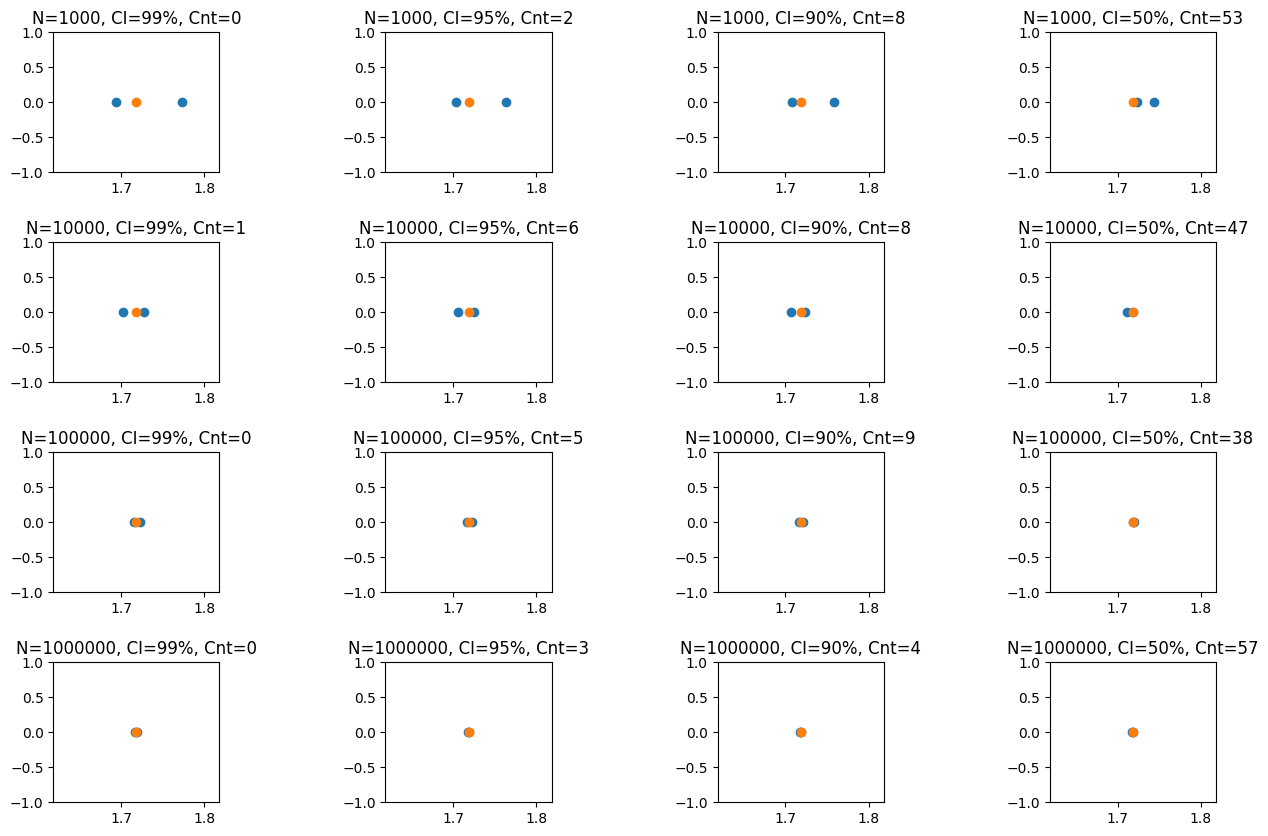

In [5]:
fig, axs = plt.subplots(sizeN, sizeM, figsize=(15,10))
fig.subplots_adjust(hspace = .5, wspace = 1)

for i in range(sizeN):
    for j in range(sizeM):
        axs[i, j].plot([lb_mat[i,j], ub_mat[i,j]], [0,0], 'o')
        axs[i, j].plot(theta, 0, 'o')
        axs[i, j].set_title('N=%i, CI=%2.0f%s, Cnt=%i' % (nN[i], 100*(1-alpha[j]), '%', counts[i,j]))
        axs[i, j].set_xlim([lowerB, upperB])
        axs[i, j].set_ylim([-boundY, boundY])
plt.show()